# Decision Tree

1. Notebook:
   - [DT from scratch](https://www.kaggle.com/code/fareselmenshawii/decision-tree-from-scratch?scriptVersionId=130941860)

## Data

### Loading

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import pprint

In [4]:
df = pd.read_csv('./data/breast-cancer.csv')
df.drop('id', inplace=True, axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### EDA

In [5]:
px.pie(df, 'diagnosis', color='diagnosis', color_discrete_sequence=['#007500','#5CFF5C'], title='Data Distru')

In [7]:
for column in  df.drop('diagnosis',axis=1).columns[5:10]:
    fig = px.scatter(data_frame=df,color='diagnosis',x=column,color_discrete_sequence=['#007500','#5CFF5C'],)
    fig.show()        

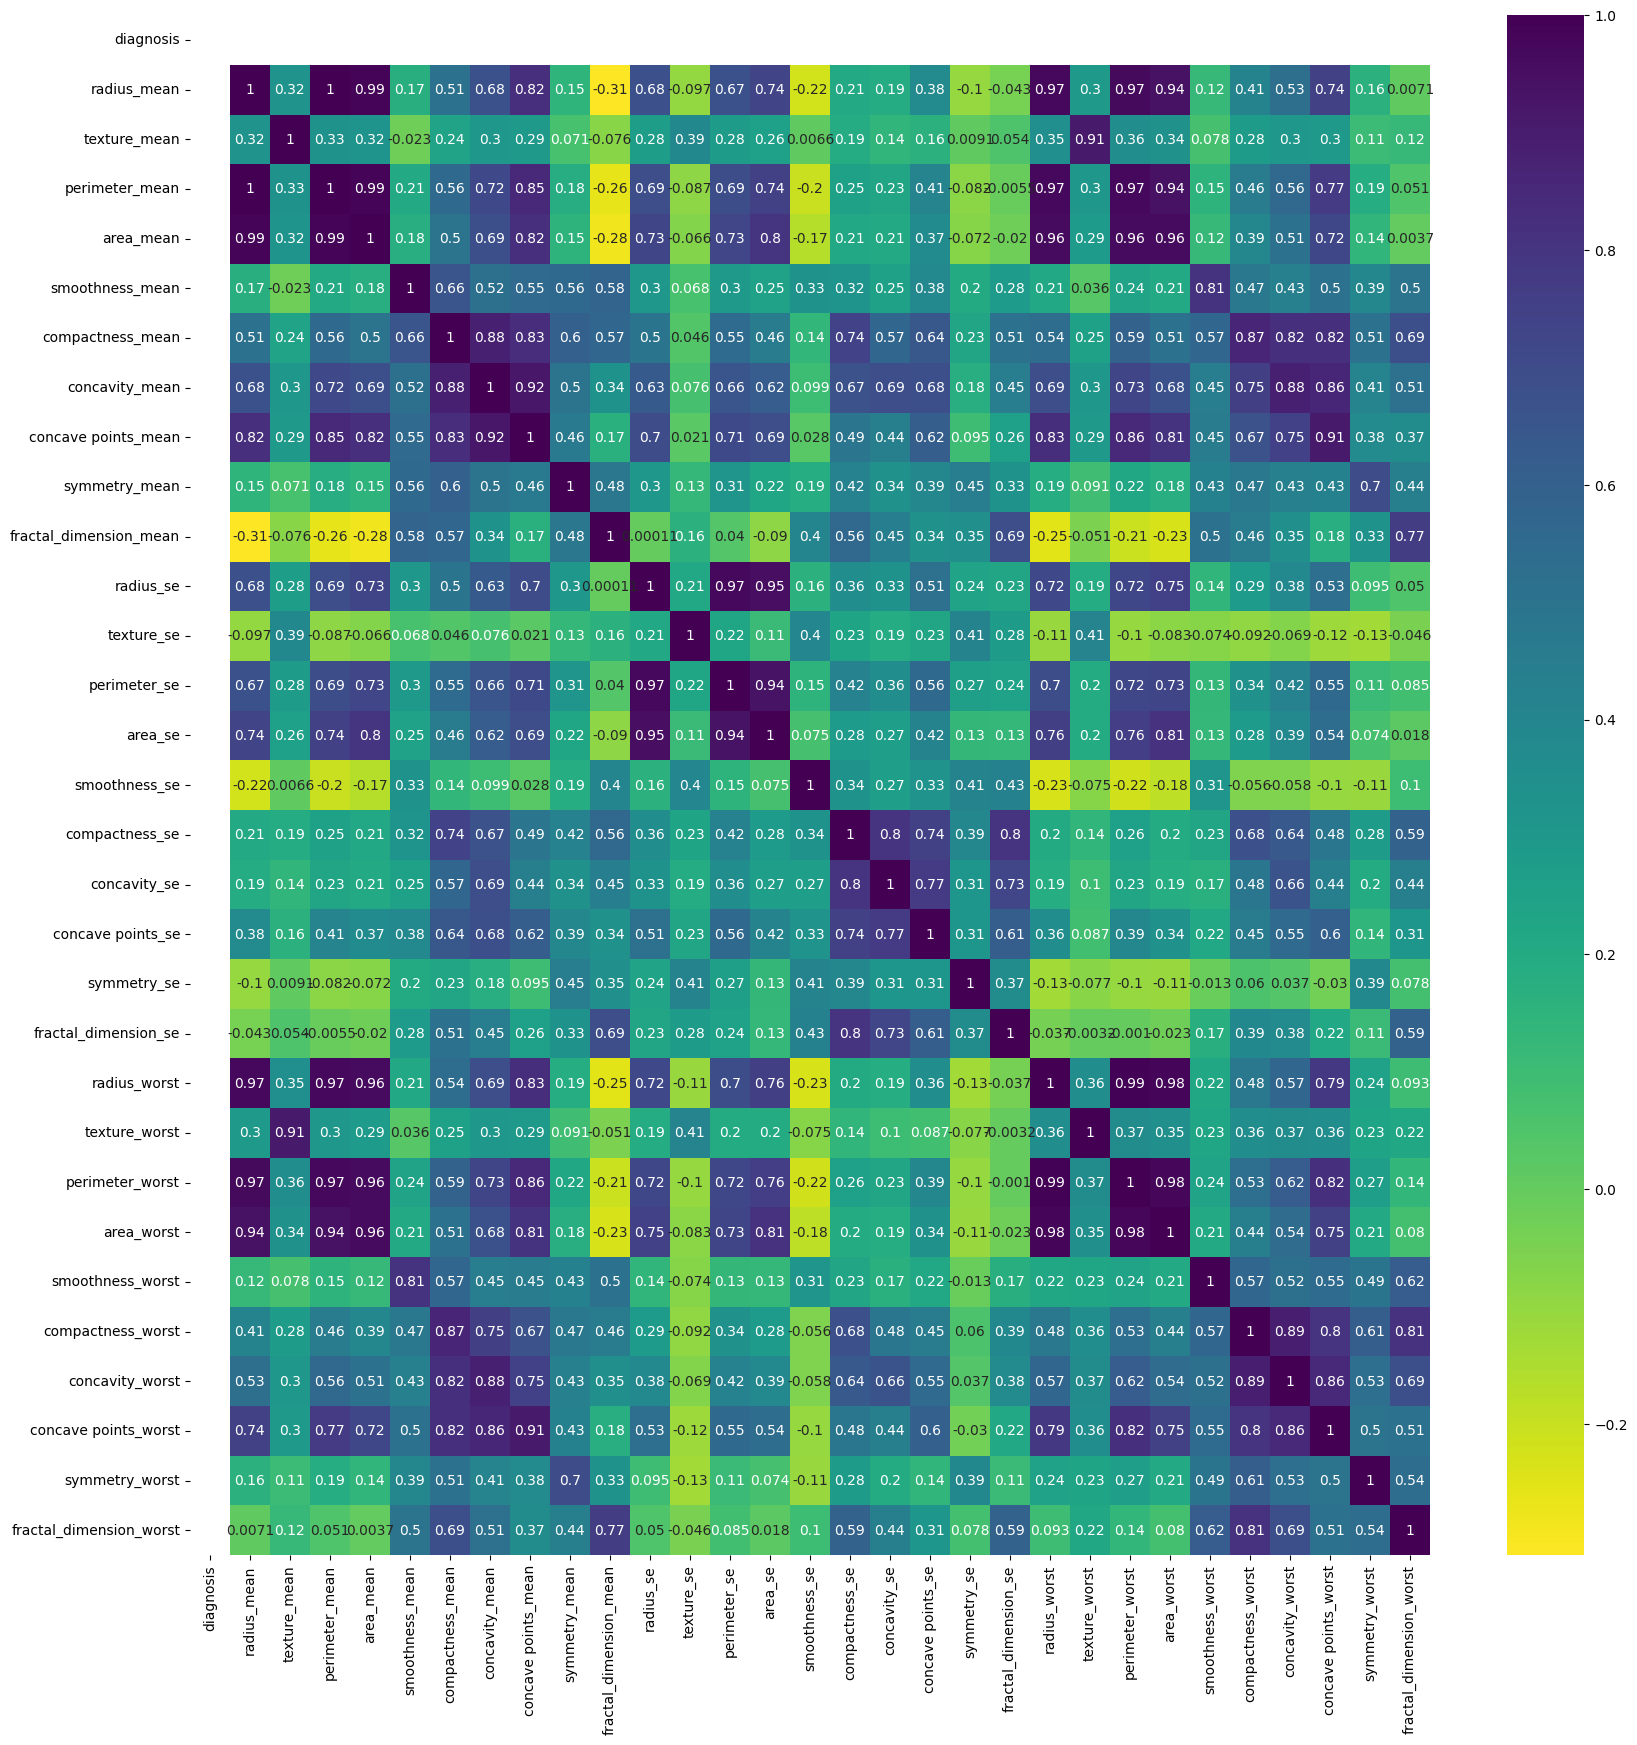

In [9]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis_r', annot=True)
plt.show()

=> conclusion: some features ain't concluded with target => ain't important => rmv them.

### Feature selection

In [32]:
# supposed to get the highly correlated features only for eccefiency, but seems like the condiion ain't working :|
h_corr = abs(corr['diagnosis'])
names = [idx for idx in h_corr.index]
names.remove('diagnosis')
pprint.pprint(names)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


In [33]:
x = df[names].values
y = df['diagnosis'].values.reshape(-1,1)

In [35]:
def scale(x):
    return (x- np.mean(x, axis=0))/(np.std(x, axis=0))

x = scale(x)

## Model - From scratch